# Sleep Analysis
Yay! We made it to the analysis.

For details on how the data was imported, see `import_data.ipynb`.

For details on how the data was cleaned, see `clean_and_explore.ipynb`.  


NOTE: I lost my Fitbit tracker on August 25, 2020, and replaced it November 7, 2020.  
**Therefore, there is a gap in the data between 2020-08-24 and 2020-11-06.**

In [283]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

#### Read all of the data in the `cleaned_data/` directory. 

In [119]:
sleep_score = pd.read_pickle('cleaned_data/sleep_score.pkl')
sleep_detail = pd.read_pickle('cleaned_data/sleep_detail.pkl')

lightly_active = pd.read_pickle('cleaned_data/lightly_active.pkl')
moderately_active = pd.read_pickle('cleaned_data/moderately_active.pkl')
very_active = pd.read_pickle('cleaned_data/very_active.pkl')
sedentary_minutes = pd.read_pickle('cleaned_data/sedentary_minutes.pkl')

step_daily = pd.read_pickle('cleaned_data/step_daily.pkl')

bpm = pd.read_pickle('cleaned_data/bpm.pkl')
resting_heartrate = pd.read_pickle('cleaned_data/resting_heartrate.pkl')

In [120]:
# A list of all the dataframes 
dfs = [
    sleep_score, 
    sleep_detail, 
    lightly_active,
    moderately_active,
    very_active,
    sedentary_minutes,
    step_daily,
    bpm,
    resting_heartrate,
]

## Merge the data into one big table
Merge the data using an inner join on the index of all the tables (`date`). 

Having all the data in the same table will make plotting faster. 

In [121]:
daily_stats = pd.concat(dfs, join='inner', axis=1)

In [171]:
# I'm also adding a column that summarizes all of the activity minutes for the day 
daily_stats['sum_active_mins'] = daily_stats['light_act_mins'] + daily_stats['moderate_act_mins'] + daily_stats['very_act_mins']
daily_stats.to_pickle('cleaned_data/daily_stats.pkl')

In [172]:
daily_stats.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 932 entries, 2019-08-22 to 2022-12-19
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   overall_sleep_score      932 non-null    float64
 1   sleep_resting_heartrate  932 non-null    float64
 2   deep_sleep_in_minutes    932 non-null    int64  
 3   minutesAsleep            932 non-null    int64  
 4   mainSleep                932 non-null    int64  
 5   deep_mins                932 non-null    float64
 6   wake_mins                932 non-null    float64
 7   light_mins               932 non-null    float64
 8   rem_mins                 932 non-null    float64
 9   light_act_mins           932 non-null    int64  
 10  moderate_act_mins        932 non-null    int64  
 11  very_act_mins            932 non-null    int64  
 12  sedentary_mins           932 non-null    int64  
 13  daily_steps              932 non-null    int64  
 14  bpm_max

## What contributes to sleep quality and minutes asleep?
A correlation matrix is used to understand if any of the measurements are correlated to `minutesAsleep` or `overall_sleep_score`. 

Values closer to -1 and 1 indicate higher covarience. Values closer to 0 indicate less covarience. 

In [141]:
daily_stats.corr()

,overall_sleep_score,sleep_resting_heartrate,deep_sleep_in_minutes,minutesAsleep,mainSleep,deep_mins,wake_mins,light_mins,rem_mins,light_act_mins,moderate_act_mins,very_act_mins,sedentary_mins,daily_steps,bpm_max,bpm_mean,resting_hr,rest_hr_error,sum_active_mins
overall_sleep_score,1.000000,0.048832,0.561916,0.725878,NaN,0.558600,0.103505,0.358791,0.626264,-0.144386,0.039503,-0.019046,-0.286930,-0.027480,-0.107691,-0.240631,-0.066843,-0.006659,-0.103620
sleep_resting_heartrate,0.048832,1.000000,-0.000597,-0.007465,NaN,0.005165,-0.019268,-0.064159,0.083518,-0.004750,-0.034879,0.007209,0.018610,-0.011259,0.093810,0.300386,0.871565,-0.009127,-0.013733
deep_sleep_in_minutes,0.561916,-0.000597,1.000000,0.601823,NaN,0.979433,0.316998,0.151354,0.385925,-0.104510,0.006414,-0.019093,-0.267716,-0.038203,-0.047584,-0.124515,0.000356,-0.041631,-0.084778
minutesAsleep,0.725878,-0.007465,0.601823,1.000000,NaN,0.590207,0.464690,0.676442,0.520905,-0.143286,0.047583,-0.014146,-0.474564,0.002116,-0.087239,-0.144350,-0.022984,0.035605,-0.098199
mainSleep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deep_mins,0.558600,0.005165,0.979433,0.590207,NaN,1.000000,0.340945,0.183884,0.399228,-0.105785,0.011511,-0.023707,-0.244815,-0.043187,-0.040753,-0.121519,0.002010,-0.043152,-0.085503
wake_mins,0.103505,-0.019268,0.316998,0.464690,NaN,0.340945,1.000000,0.436954,0.189660,-0.065575,-0.001756,-0.067634,-0.268530,-0.037090,-0.048317,-0.136647,-0.044865,-0.036883,-0.074243
light_mins,0.358791,-0.064159,0.151354,0.676442,NaN,0.183884,0.436954,1.000000,-0.104516,-0.112344,0.009937,-0.045691,-0.293196,-0.020592,-0.080677,-0.218147,-0.143667,0.021617,-0.098620
rem_mins,0.626264,0.083518,0.385925,0.520905,NaN,0.399228,0.189660,-0.104516,1.000000,-0.033105,0.070362,-0.013310,-0.267608,0.019835,-0.046375,0.067275,0.154939,0.023654,-0.004787
light_act_mins,-0.144386,-0.004750,-0.104510,-0.143286,NaN,-0.105785,-0.065575,-0.112344,-0.033105,1.000000,0.096018,-0.044179,-0.609840,0.271792,-0.005417,0.491008,0.081641,0.025494,0.790394


From the above correlation matrix, it appears that `minutesAsleep` and `sedentary_minutes` have the highest correlation. 

Let's plot that below.

<AxesSubplot:xlabel='minutesAsleep', ylabel='sedentary_mins'>

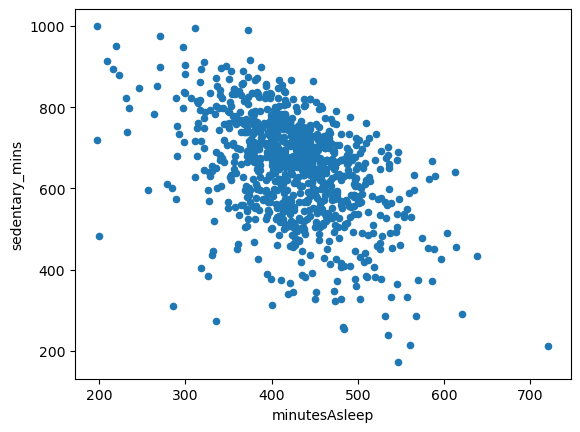

In [126]:
daily_stats.plot.scatter(x='minutesAsleep', y='sedentary_mins')

In conclusion, `sedentary_minutes` was somewhat correlated to `overall_sleep_score` and `minutesAsleep`. 

As expected, the more time spent sitting around, the lower the sleep quality / minutes asleep. 

It does not seem like the intensity of the exercise is as important as just moving itself (assuming `bpm_mean` is a good representation for long periods of higher intensity exercise). 

<AxesSubplot:xlabel='minutesAsleep', ylabel='bpm_mean'>

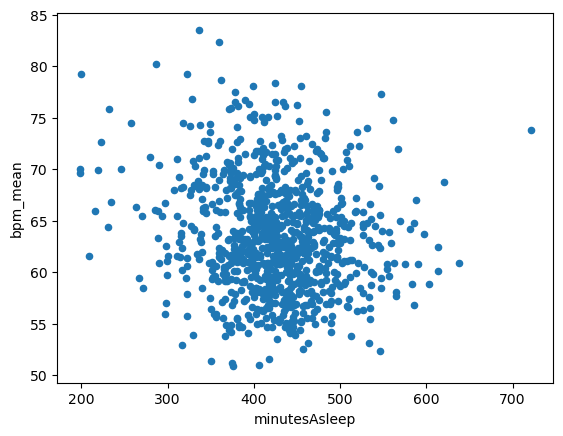

In [173]:
daily_stats.plot.scatter(x='minutesAsleep', y='bpm_mean')

## Additional exploration

On April 27, 2020, I quit my job and moved out of my apartment into a van to hike/climb/ski fulltime. Let's see what impact this had on my activity, sleep, and heartrate. 

In [217]:
# Get the mean of my stats before moving into the van 
before_van = daily_stats[:'2022-04-27'].mean()

In [218]:
# Get the mean of my stats after moving into the van 
after_van = daily_stats['2022-04-27':].mean()

In [235]:
# Concat the stats into a new table
van_change = pd.concat([before_van, after_van], keys=['before_van','after_van'], axis=1)
van_change.drop(['mainSleep', 'deep_sleep_in_minutes', 'rest_hr_error'], inplace=True)
# Calculate the difference before and after moving into the van 
van_change['difference'] = van_change['after_van'] - van_change['before_van']
# Calculate the percentage change
van_change['pct_change'] = ((van_change['after_van'] - van_change['before_van']) / van_change['after_van'] * 100)

Now let's look at the data that has changed more than 5%

In [244]:
over_five_pct = van_change[van_change['pct_change'] > 5]
over_five_pct

,before_van,after_van,difference,pct_change
minutesAsleep,416.774366,455.191257,38.416891,8.439725
wake_mins,60.457944,64.300546,3.842603,5.976003
light_mins,236.861148,259.710383,22.849234,8.797967
rem_mins,85.652870,97.027322,11.374452,11.722937
moderate_act_mins,33.156208,43.071038,9.914830,23.019714
very_act_mins,32.515354,36.699454,4.184100,11.400987
daily_steps,11483.461949,13237.147541,1753.685592,13.248214
sum_active_mins,298.702270,321.606557,22.904288,7.121835


[Text(0, 0, '8.44pct'),
 Text(0, 0, '5.98pct'),
 Text(0, 0, '8.8pct'),
 Text(0, 0, '11.7pct'),
 Text(0, 0, '23pct'),
 Text(0, 0, '11.4pct'),
 Text(0, 0, '13.2pct'),
 Text(0, 0, '7.12pct')]

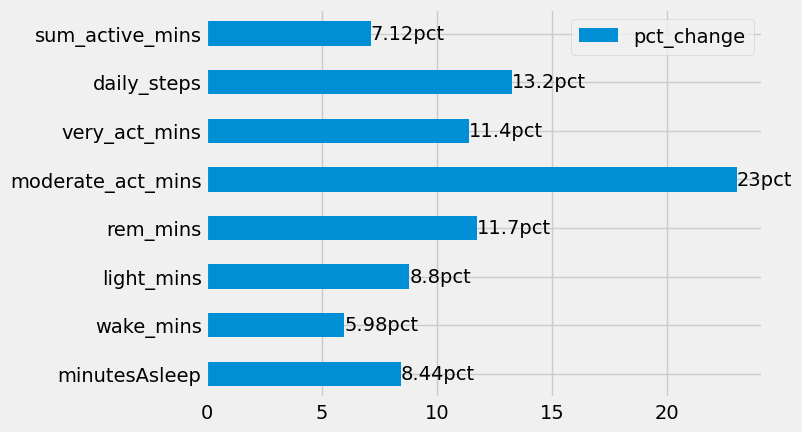

In [278]:
matplotlib.style.use('fivethirtyeight')
change = over_five_pct.plot.barh(y='pct_change')
change.bar_label(change.containers[0], fmt='%.3gpct')

Overall, I'm sleeping more and moving more! Best of both worlds! 